# Limpiando MetroNetwork 

In [1]:
include("graphs_metro.txt");

### `lineas_metro.txt`

Contiene las *variables*: <br>
**`LineaN:`** N-ésima línea con el nombre de las estaciónes. <br>
**`Express_LíneaN:`** N-ésima línea Express (línea de sólo transbordos)<br>
**`Todas_Lineas:`** Arreglo donde cada entrada es una línea entera; así `Todas_Lineas[i][j]` nos dará la estación `j` de la línea `i`. <br>
**`transfer_list:`** Arreglo de todos los transbordos de `Todas_Líneas`. <br>
**`transfer_listplus:`** Arreglo de todos los transbordos de `Todas_LíneasPlus`.

y las  *funciones*: <br>
**`Length_Lineas(total_lines):`** Número de estaciones de cada línea, en orden de línea. <br>
**`Length_Estaciones(total_lines):`** Número total de estaciones en toda la red <br>
**`GetStationNumber(station_name, line_number, total_lines) :`** Se da el nombre de una estación y la línea en donde se encuentra, y regresa el número de estación que le corresponde de la red. <br>
**`GetStationName(station_number, total_lines) :`** Dado el número de estación en la red, te regresa el nombre de estación que le corresponde. <br>
**`Transfer_List(total_lines):`** Dada una *red* de Metro, nos regresa una lista con todos los números de tranbordo.

**Obs:** El default es siempre `Todas_Lineas`.

### `graphs_metro.txt`

Contiene las *variables*: <br>
**`D_norm:`** Matriz con todas las distancias mínimas entre estaciones de `Todas_Lineas`.<br>
**`D_plus:`** Matriz con todas las distancias mínimas entre estaciones de `Todas_LineasPlus`.

y las *funciones*: <br>
**`MetroNetwork(total_lines):`** Hace una red tipo `Graph` con el número de estaciones totales en el arreglo de líneas. <br>
**`ConnectSimpleNetwork(total_lines):`** Une las estaciones de cada línea con aristas, sin considerar transbordos.
**`ConnectLines(total_lines):`** Une con aristas los transbordos de la red. <br>
**`ConnectFullNetwork_Weighted(normal_edge, transit_edge,total_lines):`** Crea la *red* de todas las líneas, dándole un peso `normal_edge`entre estaciones y `transit_edge` entre transbordos. <br>
**`NormalesyTrasbordos(matrix_dist, est_init, est_final,transit_edge_dist, normal_edge_dist):`** : Regresa una tupla con el número de estaciones recorridas y el número de transbordos efectuados. <br>
**`NormalesTrasbordosyExpress(matrix_dist, est_init, est_final,transit_edge_dist, normal_edge_dist, express_edge_dist):`** Nos da una tupla con número de estaciones, número de transbordos y número de estaciones express recorridas. <br>
**`MatrixDist(transfer_list, total_lines):`** Crea una matriz `D` con las **distancias mínimas** entre estaciones.<br> *Ej: `D[i,j]` = distancia mínima entre i-ésima y j-ésima estación.* 

**Obs_1:** Falta incluir el "peso" de cada arista, dependiendo de su tipo. <br>
**Obs_2:** El default es siempre `Todas_Lineas`.

<img src="Mexico_City_metro.png"> 

 que obtengamos el número de estaciones normales recorridas y los trasbordos. Lo que queremos es lo siguiente: <br>
* Tomamos aletoriamente dos estaciones $inicio = rand(0, N)$ $ fin = rand(0, N)$, pedimos $inicio != fin$ con un if.
* Calculamos el número de estaciones normale y el número de trasbordos y después hacemos lo siguiente
* Cuando un pasajero se sube al metro espera un tiempo $t_{espera}$ a que pase el metro, suponemos que máximo el metro tarda en pasar $t_{max}$ (ej. a lo más tarda 15 minutos, entonces $t_{max} = 15\times60 s$). Suponemos que la distribución es uniforme (aunque después sería bueno asumir distribución gaussiana o poisson... pero después vemos eso).
Entonces $t_{espera} = rand()*t_{max}$. <br>
* Cuando el metro se detiene en una estación se detiene a lo menos $t_{parada_min}$ y a lo más $t_{parada_max}$. Entonces por cada estación que pare el metro se debe de tomar en cuenta $t_{parada} = rand(t_{parada_min}, t_{parada_max})$ (o como sea que se ponga en la función) <br>
* Cuando el pasajero hace un trasbordo entonces tarda en caminar un tiempo $t_{trasbordo}$ y además debe de esperar a que vuelva a pasar el camión. Volvemos a calcular un $t_{espera} = rand()*t_{max}$.
* Finalmente sumamos todo el tiempo y vemos total de estaciones que recorrio y lo guardamos en una lista apropiada. Después vamos con el siguiente pasajero y hacemos lo mismo.

In [2]:
using PyPlot
using Distributions

INFO: Loading help data...


In [3]:
#Peso de las aristas
normal_edge_dist=1
transit_edge_dist=1.1

#Constantes de tiempos
tprom_espera = 4*60.
t_viaje = normal_edge_dist*60 #- tprom_parada 
tprom_parada = 15.
t_tras = 2*60.

120.0

In [4]:
#Simula N pasajeros de estaciones iniciales y finales aleatorias.
#Regresa Estaciones viajadas, Tiempo transcurrido, Velocidad media
function PasajerosGaussiana(DistMatrix, tprom_espera, t_viaje, tprom_parada, t_tras, N_pasajeros, transit_edge_dist, normal_edge_dist)
    N_est = length(DistMatrix[1, :])
    Stations_traveled = zeros(N_pasajeros)
    Time_traveled = zeros(N_pasajeros)
    Velocidad = zeros(N_pasajeros)
    for pasajero = 1:N_pasajeros
        initial_station = rand(1:N_est)
        end_station = rand(1:N_est)
        while GetStationName(initial_station) == GetStationName(end_station)
            initial_station = rand(1:N_est)
            end_station = rand(1:N_est) 
        end
        num_est, num_tras = NormalesyTrasbordos(DistMatrix, initial_station, end_station, transit_edge_dist, normal_edge_dist)
        Stations_traveled[pasajero] = num_est
        tiempo_tras = 0
        for tras = 1:num_tras
            tiempo_tras += tprom_espera*rand() + t_tras
        end
        tiempo_paradas = 0
        for parada = 1:num_est
            tiempo_paradas += tprom_parada*rand() + t_viaje
        end
        tiempito = tprom_espera*rand() + tiempo_tras + tiempo_paradas
        Time_traveled[pasajero] = tiempito
        Velocidad[pasajero] = num_est/tiempito
        
    end
    return Stations_traveled, Time_traveled, Velocidad
end

PasajerosGaussiana (generic function with 1 method)

In [13]:
ESTg,TIMEg,VELg = PasajerosGaussiana(D_norm, tprom_espera, t_viaje, tprom_parada, t_tras, 100_000, transit_edge_dist, normal_edge_dist);

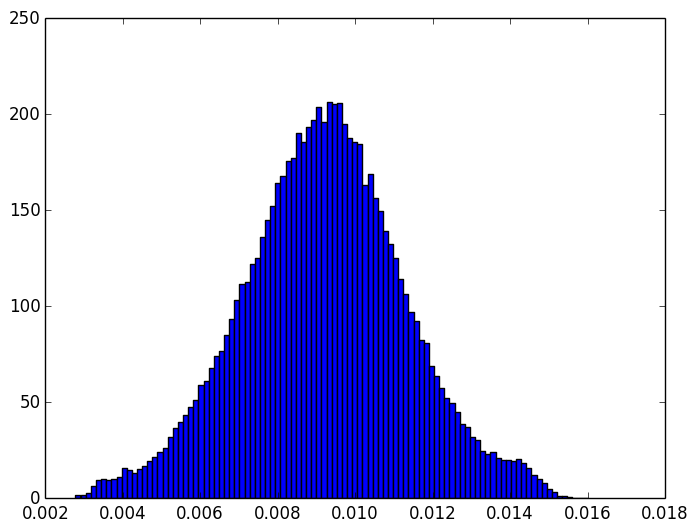

([1.51297,1.73991,2.79899,6.65706,9.75865,10.2125,9.5317,10.1369,11.0447,15.8105  …  9.98559,7.94309,4.8415,3.25288,1.13473,1.21038,0.605188,0.151297,0.378242,0.226945],[0.00278755,0.00291974,0.00305193,0.00318412,0.00331631,0.0034485,0.00358069,0.00371288,0.00384507,0.00397726  …  0.0148169,0.0149491,0.0150813,0.0152134,0.0153456,0.0154778,0.01561,0.0157422,0.0158744,0.0160066],{PyObject <matplotlib.patches.Rectangle object at 0x1187791d0>,PyObject <matplotlib.patches.Rectangle object at 0x118779850>,PyObject <matplotlib.patches.Rectangle object at 0x118779ed0>,PyObject <matplotlib.patches.Rectangle object at 0x11878f590>,PyObject <matplotlib.patches.Rectangle object at 0x11878fc10>,PyObject <matplotlib.patches.Rectangle object at 0x11879c2d0>,PyObject <matplotlib.patches.Rectangle object at 0x11879c950>,PyObject <matplotlib.patches.Rectangle object at 0x11879cfd0>,PyObject <matplotlib.patches.Rectangle object at 0x1187aa690>,PyObject <matplotlib.patches.Rectangle object at 0x1187aad1

In [14]:
plt.hist(VELg,bins=100,normed=true)

In [7]:
function PasajerosPoisson(DistMatrix, tprom_espera, t_viaje, tprom_parada, t_tras, N_pasajeros, transit_edge_dist, normal_edge_dist)
    N_est = length(DistMatrix[1, :])
    Stations_traveled = zeros(N_pasajeros)
    Time_traveled = zeros(N_pasajeros)
    Velocidad = zeros(N_pasajeros)
    for pasajero = 1:N_pasajeros
        initial_station = rand(1:N_est)
        end_station = rand(1:N_est)
        while GetStationName(initial_station) == GetStationName(end_station)
            initial_station = rand(1:N_est)
            end_station = rand(1:N_est) 
        end
        num_est, num_tras = NormalesyTrasbordos(DistMatrix, initial_station, end_station, transit_edge_dist, normal_edge_dist)
        Stations_traveled[pasajero] = num_est
        tiempo_tras = 0
        for tras = 1:num_tras
            tiempo_tras += tprom_espera*rand(Distributions.Poisson()) + t_tras
        end
        tiempo_paradas = 0
        for parada = 1:num_est
            tiempo_paradas += tprom_parada*rand(Distributions.Poisson()) + t_viaje
        end
        tiempito = tprom_espera*rand(Distributions.Poisson()) + tiempo_tras + tiempo_paradas
        Time_traveled[pasajero] = tiempito
        Velocidad[pasajero] = num_est/tiempito
        
    end
    return Stations_traveled, Time_traveled, Velocidad
end

PasajerosPoisson (generic function with 1 method)

In [8]:
ESTp,TIMEp,VELp = PasajerosPoisson(D, tprom_espera, t_viaje, tprom_parada, t_tras, 100_000, transit_edge_dist, normal_edge_dist);

LoadError: D not defined
while loading In[8], in expression starting on line 1

In [9]:
plt.hist(VELp,bins=100,normed=true);

LoadError: VELp not defined
while loading In[9], in expression starting on line 1

In [10]:
ConnectFullNetwork_Weighted(normal_edge_dist,transfer_edge_dist,Todas_LineasPlus);

LoadError: transfer_edge_dist not defined
while loading In[10], in expression starting on line 1